Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
NAME = "양동훈"
COLLABORATORS = "Python"

---

# Exercise: Integration and Differentiation
**강좌**: *Numerical Analysis*

**Due**: 2024/12/5

## Problem #1

Write Python code to implement the following numerical integration methods:  
- Develop a function to approximate the integral of a given function using the composite trapezoidal rule.  
- Develop a function to approximate the integral of a given function using Simpson's 1/3 rule.  

- Input parameters 
  * Function *f* to be integrated.  
  * Integration bounds *a* (lower limit) and *b* (upper limit).  
  * Number of subintervals *n* (must be even for Simpson's rule).
    
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [4]:
# Write trapezoid rule
def trapezoid(f, a, b, n):
    # YOUR CODE HERE
     #DIY Trapezoid 연산 함수
    '''
    Trapezoid integration

    parameter
    -------------
    a : float 
        구간의 시작점
    b : float
        구간의 끝점
    f : function
        적분하는 함수
    n : int
        구간의 간격 수
        
    retrun
    -------------
    I : float
        적분 값
    '''
    
    h = (b-a)/n
    I = h/2*(f(a) + f(b))
    for i in range(1, n) :
        I +=  h/2*(2*f(a+h*i))

    return I


In [5]:
# Write Simpson 1/3 rule
import numpy as np
def simpson(f, a, b, n):
    # YOUR CODE HERE
    '''
    Simpson 1/3 rule Integration

    Partameters 
    --------------
    f : function
        적분하는 함수
    a : float
        구간의 시작점
    b : float
        구간의 끝점
    n : int
        구간의 간격 수

    return 
    --------------
    I : float
        적분한 값
    '''
    if n % 2 != 0 :
        raise ValueError("Number of subintervals (n) must be even for Simpson's 1/3 rule.")
    #구간의 간격 수가 짝수여야만 simpson 1/3 rule이 가능하다
    else : 
        xi = np.linspace(a,b,n+1)
        I = f(a) + f(b)
        for i in range(1,len(xi)-1) :
            if i % 2 == 0 :
                I += 2*f(xi[i])
            else : 
                I += 4*f(xi[i])
    
        I *= (b-a)/(3*n)

        return I


In [18]:
import numpy as np

# test problem
f = np.cos
a, b = 0, np.pi/2

# exact integration on [a, b]
Ie = 1.0

# Verification
assert(abs(trapezoid(f, a, b, 10) - Ie) < 1e-2)
assert(abs(simpson(f, a, b, 10) - Ie) < 1e-5)
simpson(f,a,b, 10)

1.0000033922209006

## Problem #2
Derive the finite difference formula to approximate the first derivative $f'(x)$ using the function values at points $f_{i+2}$, $f_{i+1}$, and $f_i$.  

1. **Derivation:**  
   - Use Taylor series expansions to derive the finite difference formula for $f'(x)$ with the best possible accuracy.
   - Clearly show the step-by-step process.  

2. **Implementation:**  
   - Write a Python function to compute the first derivative at $x_i$ using the derived formula.  

3. **Validation:**  
   - Test your formula and implementation by approximating the derivative of $f(x) = \sin(x)$ at $x = 0$ using a step size $h = 0.1, 0.05, 0.025$.  
   - Compare the result with the exact derivative, $f'(x) = \cos(x)$.  

In [7]:
# Write your answer
def df(f, x, h):
    """
    f : function
    x : float
    h : float
        step size
    """
    # YOUR CODE HERE
    #도함수를 구하는 것이므로 xi, xi+h, xi+2h의 taylor expansion을 3번째 항까지 진행 나머지항은 Truncation error라고 생각한다.
    A = np.array([[1,1,1],#A의 첫번째 row는 xi, xi+h, x+2h를 taylor expasion했을 때 첫번째 항들이다 - > f(xi)
                  [2*h, h, 0], #A의 두번째 row는 두번째 항이다. -> f'(x)*(delta x)
                  [4*h**2, h**2, 0]]) #A의 세번째 row는 세번째 항으로 -> f"(x)*(delta x)**2이다.
    #f,f',f"의 계수들만 matrix로 저장
    b = np.array([0,1,0]) # f'(x)를 구해야하므로 0,1,0의 결과값이 나와야한다.
    coef = np.linalg.solve(A,b) 

    df1 = coef[0]*f(x+2*h) + coef[1]*f(x+h) +coef[2]*f(x)

    #위 계산 방법처럼 forward, backward, central를 다 이용하여 미분 값을 구해야 정확도를 높일 수 있다.

    return df1

In [8]:
# Check your result
hs = [0.1, 0.05, 0.25]
f = np.sin

assert abs(df(f, 0, hs[0]) - 1.003321) < 1e-6
assert abs(df(f, 0, hs[1]) - 1.000832) < 1e-6
assert abs(df(f, 0, hs[2]) - 1.020380) < 1e-6

## Problem #3
Recall that the velocity of the freefalling parachutist with linear drag can be computed analytically as

$v(t) = \frac{gm}{c}(1 - e^{-(c/m)t})$

where $v(t)$ = velocity (m/s), $t$ = time (s), $g$ = 9.81 m/s2, $m$ = mass (kg), $c$ = linear drag coefficient (kg/s). 

Use Romberg integration to compute how far the jumper travels during the first 8 seconds of free fall given $m$ = 80 kg and $c$ = 10 kg/s. 

Compute the answer to $\epsilon_{t}$ =1%.

In [9]:
# Write your answer
# Save the result in ans_a
# YOUR CODE HERE
g = 9.81
m = 80
c = 10
v = lambda t : g*m/c*(1-np.exp(-(c/m)*t)) #v-t graph의 면적이 이동한 거리이기 때문에 적분으로 답을 찾아야한다.
Ie = 230.9694283
# Write trapezoid rule
def trapezoid(f, a, b, n):

    h = (b-a)/n
    I = h/2*(f(a) + f(b))
    for i in range(1, n) :
        I +=  h/2*(2*f(a+h*i))

    return I

def romberg_integration(f, x0, xf, tol = 0.01, max_iter = 100) :
    Iii = np.zeros((max_iter, max_iter))
    n = 1
    h = (xf-x0)/n # 초기 간격

    Iii[0,0] = trapezoid(f,x0,xf,1)

    for i in range(1, max_iter) :
        n *= 2
        Iii[i,0] = trapezoid(f,x0,xf,n)
    
        for j in range(1, i+1) :
            Iii[i, j] = (4 ** (j) * Iii[i, j - 1] - Iii[i - 1, j - 1]) / (4 ** (j) - 1)

        if abs((Iii[i, i] - Iii[i - 1, i - 1])/Iii[i - 1, i - 1]) < tol: 
            return Iii[i, i] 

    raise ValueError("Romberg integration did not converge within the maximum iterations.")



ans_a = romberg_integration(v,0,8)

print(ans_a)

230.96922983477413


In [10]:
# Do not remove!!

## Problem #4

The objective of this problem is to compare first-order accurate forward, backward, and second-order centered finite-difference approximations of the second derivative of a function to the actual value of the derivative. 

This will be done for

$f(x)=e^{-2x}-x$

- (a) Use calculus to determine the correct value of the second derivative at $x$ = 2.
- (b) To evaluate the second-derivative centered finite-difference approximations, start with  $\Delta x = 0.1$. Thus, for the first evaluation, the x values for the centered difference approximation will be $x$ = 1.9 and 2.1. Then, decrease in increments of 0.01 down to a minimum value of $\Delta x$ = 0.01.

- (c) Repeat (b) the second-derivative forward and backward differences. (Note that these can be done at the same time that the centered difference is computed in the loop.)
- (d) Plot the results of (b) and (c) versus x. Include the exact result on the plot for comparison.

In [11]:
# Write your answer (a)
# Save the result in ans_a
# YOUR CODE HERE

f = lambda x : np.exp(-2*x) - x
second_derivative2 = lambda x : 4*np.exp(-2*x)
#a
ans_a = second_derivative2(2) # x=2에서의 이계도함수의 exact value

#b
def central_second_difference(f, x, dx) : #central difference를 이용해서 이계도함수를 구하는 함수
    '''
    parameters
    -----------
    f : function
        이계도함수를 구하고자 하는 함수
    x : float
        구하는 위치
    dx : float
    '''
    cf2 = (f(x+dx) - 2*f(x) + f(x-dx))/dx**2

    return cf2

dx_value = np.arange(0.1, 0.01 - 0.001, -0.01)  # 0.01까지 포함되도록 0.001을 뺌
ans_b = []
for i in dx_value :
    result = central_second_difference(f,2,i)
    ans_b.append(result)

#c
def forward_second_difference(f, x, dx) :
    '''
    parameters
    -----------
    f : function
        이계도함수를 구하고자 하는 함수
    x : float
        구하는 위치
    dx : float
    '''
    ff2 = (f(x+2*dx)-2*f(x+dx)+f(x))/dx**2

    return ff2

def backward_second_difference(f, x, dx) :
    '''
    parameters
    -----------
    f : function
        이계도함수를 구하고자 하는 함수
    x : float
        구하는 위치
    dx : float
    '''
    bf2 = (f(x-2*dx)-2*f(x-dx)+f(x))/dx**2

    return bf2

dx_value = np.arange(0.1, 0.01 - 0.001, -0.01)  # 0.01까지 포함되도록 0.001을 뺌
ans_c_forward = [] #forward 방식으로 구한 값들을 저장
ans_c_backward = [] #backward 방식으로 구한 값들을 저장
for i in dx_value :
    result_f = forward_second_difference(f,2,i)
    result_b = backward_second_difference(f,2,i)
    ans_c_forward.append(result_f)
    ans_c_backward.append(result_b)

print(ans_a)
print(ans_b)
print(ans_c_backward)
print(ans_c_forward)
print(dx_value)

0.07326255555493671
[0.07350708991751274, 0.07346057821221728, 0.07341898243817116, 0.07338229593565969, 0.07335051283166268, 0.07332362803893479, 0.07330163725435809, 0.07328453695887285, 0.07327232441622888, 0.07326499767090693]
[0.08978176236953404, 0.08794827974057524, 0.08615797402838211, 0.08440973231480244, 0.08270247227949562, 0.08103514131647661, 0.07940671567716037, 0.07781619964002867, 0.07626262470361543, 0.0747450488014493]
[0.060182515084683516, 0.06135943269365613, 0.0625635298769078, 0.06379550330407893, 0.06505606887406849, 0.06634596227570447, 0.06766593956680765, 0.0690167777688758, 0.0703992754813584, 0.07181425352165077]
[0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03 0.02 0.01]


In [12]:
# Do not remove!!

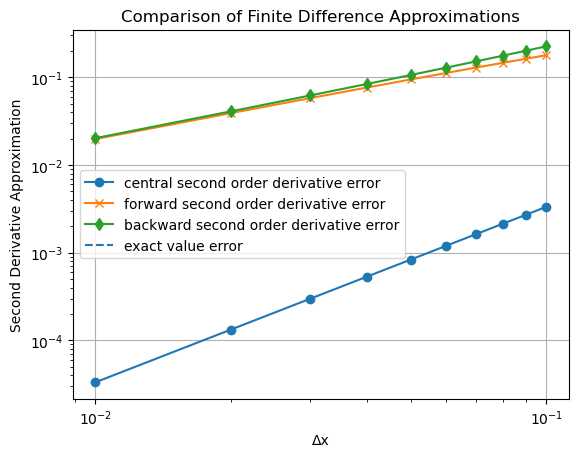

In [46]:
# Write your answer (d)
# YOUR CODE HERE
from matplotlib import pyplot as plt

plt.loglog(dx_value, abs(ans_b-ans_a)/ans_a, label = 'central second order derivative error', marker = 'o')
plt.loglog(dx_value, abs(ans_c_forward-ans_a)/ans_a, label = 'forward second order derivative error', marker = 'x')
plt.loglog(dx_value, abs(ans_c_backward-ans_a)/ans_a, label = 'backward second order derivative error', marker = 'd')
plt.axhline(y=ans_a-ans_a, label = 'exact value error', linestyle ='--')

plt.xlabel('Δx')
plt.ylabel('Second Derivative Approximation')
plt.title('Comparison of Finite Difference Approximations')
plt.legend()
plt.grid(True)
plt.show()

#forward와 backward는 1차 정확도로 2차 정확도인 central보다 오차가 더 큼을 볼 수 있고, 오차는 Δx의 크기에 결정되는 데 Δx가 작아질 수록 오차가 줄어듦을 볼 수 있다.

In [ ]:
# YOUR CODE HERE
#(c) 
import numpy as np
from matplotlib import pyplot as plt
def df(f, x, h):
    """
    f : function
    x : float
    h : float
        step size
    """
    # YOUR CODE HEREs
    #도함수를 구하는 것이므로 xi, xi+h, xi+2h의 taylor expansion을 3번째 항까지 진행 나머지항은 Truncation error라고 생각한다.
    A = np.array([[1,1,1],#A의 첫번째 row는 xi, xi+h, x+2h를 taylor expasion했을 때 첫번째 항들이다 - > f(xi)
                  [2*h, h, 0], #A의 두번째 row는 두번째 항이다. -> f'(x)*(delta x)
                  [4*h**2, h**2, 0]]) #A의 세번째 row는 세번째 항으로 -> f"(x)*(delta x)**2이다.
    #f,f',f"의 계수들만 matrix로 저장
    b = np.array([0,1,0]) # f'(x)를 구해야하므로 0,1,0의 결과값이 나와야한다.
    coef = np.linalg.solve(A,b) 

    df1 = coef[0]*f(x+2*h) + coef[1]*f(x+h) +coef[2]*f(x)

    #위 계산 방법처럼 forward, backward, central를 다 이용하여 미분 값을 구해야 정확도를 높일 수 있다.

    return df1

def ddf(f, x, h):
    """
    f : function
    x : float
    h : float
        step size
    """
    # YOUR CODE HERE
    #도함수를 구하는 것이므로 xi, xi+h, xi+2h의 taylor expansion을 3번째 항까지 진행 나머지항은 Truncation error라고 생각한다.
    A = np.array([[1,1,1],#A의 첫번째 row는 xi, xi+h, x+2h를 taylor expasion했을 때 첫번째 항들이다 - > f(xi)
                  [2*h, h, 0], #A의 두번째 row는 두번째 항이다. -> f'(x)*(delta x)
                  [4*h**2, h**2, 0]]) #A의 세번째 row는 세번째 항으로 -> f"(x)*(delta x)**2이다.
    #f,f',f"의 계수들만 matrix로 저장
    b = np.array([0,0,1]) # f'(x)를 구해야하므로 0,1,0의 결과값이 나와야한다.
    coef = np.linalg.solve(A,b) 

    ddf1 = coef[0]*f(x+2*h) + coef[1]*f(x+h) +coef[2]*f(x)

    #위 계산 방법처럼 forward, backward, central를 다 이용하여 미분 값을 구해야 정확도를 높일 수 있다.

    return ddf1
f = lambda x : np.sin(x)
xi = np.linspace(-1,1,100)
f_exact = lambda x : np.cos(x)
f_exact_2nd = lambda x : -np.sin(x)
df1_error = []
ddf1_error = []
h = [0.1, 0.05, 0.025]
for i in h :
    df1 = df(f, x =0, h = i)
    df1_e = abs(df1 - f_exact(0))/(f_exact(0))
    df1_error.append(df1_e)
    ddf1 = ddf(f,0, h =i)
    ddf1_e = abs(ddf1 - f_exact_2nd(0))/abs(max(1e-6, f_exact_2nd(0))) #이계 미분값이 x=0에서 0이므로 무한대로 가는 것을 방지하게 위해서 0에 비슷한 아주 작은 값으로 연산함
    ddf1_error.append(ddf1_e)

plt.loglog(h, df1_error, label='1st derivative error')
plt.loglog(h, ddf1_error, label = '2nd derivative error')
plt.title('relative error log scale')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)
plt.show()
#1계 2계미분은 오차가 h의 크기, 즉 간격의 크기로 정해지는데 간격이 커지면 오차가 더 커짐을 알 수 있다.

In [ ]:
# YOUR CODE HERE
#(a) regression은 주어진 데이터에 가장 적합한 분포를 따르는 추세선을 찾는 것이고, interpolation은 주어진 데이터를 모두 따르는 분포이다. 따라서 이런 점의 차이가 있다.

In [ ]:
# YOUR CODE HERE
#(b) ivp 문제를 풀 때 초기조건과 주어진 상비분 방정식을 통해서 해를 찾는 것인데, 방법에는 Explicit euler, 2차 runge kutta, 4차 runge kutta의 방식이 있는데  h에 따라서 간격의
#따라서 정확도가 증가하지만 무조건 크다고 좋은 것이라니라 Explicit_euler와 2차 runge_kutta는 -2<lambda*h<0인 구간에서 stability하고 4차 runge_kutta는 앞에 두 함수보다는 더 넓은 범위에서 stability하다 약 -3<lambda*h<0.2 정도이다.
#따라서 안정적인 구간안에서 적절한 h, 간격을 통해서 정확도를 높일 수 있다.

In [ ]:
# Write your answer (b)
# YOUR CODE HERE
m = 0.2 
CD =0.47
r = 0.05
x0 = r*np.cos(65*np.pi/180)
z0 = r*np.sin(65*np.pi/180)
S = np.pi*r**2
g = 9.81
den = 1.225
v0 = 100
vx0 = v0*np.cos(65*np.pi/180)
vz0 = v0*np.sin(65*np.pi/180)

y0 = np.array([x0,z0,vx0,vz0])

def f(t, y) :
    return np.array([y[2],y[3],-1/m*(0.5*CD*den*S*np.sqrt((y[2])**2+(y[3])**2)*y[2]), -1/m*(0.5*CD*den*S*np.sqrt((y[2]**2)+(y[3]**2))*y[3]-m*g)])

def explicit_euler(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0

    for i in range(len(t) - 1):
            y[:, i+1] = y[:, i] + h*f(t[i], y[:, i])


    return t, y

def runge_kutta4(f, tspan, y0, h):
    """
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    for i in range(len(t) - 1):
            k1 = f(t[i], y[:, i])
            k2 = f(t[i] + h / 2, y[:, i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[:, i] + h * k2 / 2)
            k4 = f(t[i] + h, y[:, i] + h * k3)
        
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

t_span = (0,10)
h = [0.05, 0.1, 0.5, 1]
for i in h :
    r4t, r4y = runge_kutta4(f, t_span, y0, i)
    eulert, eulery = explicit_euler(f, t_span, y0, i)
    plt.plot(r4t,r4y[0],label=f"h = {i}, runge kutta x")
    plt.plot(eulert, eulery[0], linestyle ='--', label=f"h = {i}, euler x")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('4th Runge Kutta vs Euler')
    plt.legend()
    plt.grid(True)
plt.show()
for i in h :
    r4t, r4y = runge_kutta4(f, t_span, y0, i)
    eulert, eulery = explicit_euler(f, t_span, y0, i)
    plt.plot(r4t,r4y[1],label=f"h = {i}, runge kutta z")
    plt.plot(eulert, eulery[1], linestyle ='--', label=f"h = {i}, euler z")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('4th Runge Kutta vs Euler')
    plt.legend()
    plt.grid(True)
plt.show()

for i in h :
    r4t, r4y = runge_kutta4(f, t_span, y0, i)
    eulert, eulery = explicit_euler(f, t_span, y0, i)
    plt.plot(r4t,r4y[2],label=f"h = {i}, runge kutta vx")
    plt.plot(eulert, eulery[2], linestyle ='--', label=f"h = {i}, euler vx")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('4th Runge Kutta vs Euler')
    plt.legend()
    plt.grid(True)
plt.show()

for i in h :
    r4t, r4y = runge_kutta4(f, t_span, y0, i)
    eulert, eulery = explicit_euler(f, t_span, y0, i)
    plt.plot(r4t,r4y[3],label=f"h = {i}, runge kutta vz")
    plt.plot(eulert, eulery[3], linestyle ='--', label=f"h = {i}, euler vz")
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('4th Runge Kutta vs Euler')
    plt.legend()
    plt.grid(True)
plt.show()
#h가 0.05, 0.1일때는 오일러와 룬게쿠타 방식이 비슷하지만 델타t가 커짐에 따라 오차가 생긴다 이는 오일러 방식은 오차가 누적되어서 그런 것으로 생각된다. 그리고 델타t = 1일 떄는
#오일러 방식이 룬게쿠타 방식에 비해서 오차가 크게 발생함을 볼 수 있는데 이는 룬게쿠타 방식이 오일러 방식보다 stability영역이 더 넓어서 같은 간격일 때 오일러는 불안정하고 룬게쿠타는 안정함을 볼 수 있다.

In [ ]:
# Write your answer (a)
# Plot your regression function and show that the correlation coefficient R > 0.999.
# YOUR CODE HERE
data = np.loadtxt('air.csv', skiprows=1, delimiter=',').T
altitude, density = data[0], data[6]

def polyreg(x, y, n):
    """
    Regression for polynomial
    
    Parameters
    ----------
    x : array
        x
    y : array
        y
    n : integer
        order
    
    Returns
    --------
    z : array
        coeffcient of polynomials
    r : float
        correlation coefficient
    """
    # YOUR CODE HERE
    A = np.zeros((n+1,n+1))
    b = np.zeros(n+1)
    for i in range(n+1) :
        b[i] = sum(y*x**i)
        for j in range(n+1) :
            A[i,j] = sum(x**(i+j))
    z = np.linalg.solve(A, b)
    poly = 0
    for i in range(0,len(z)) :
        poly += z[i]*x**i
    Sr = sum((y-poly)**2)
    St = sum((y-y.mean())**2)
    r2 = (St-Sr)/St
    r = np.sqrt(r2)
    print(r)

    def regression_function(x) :
        result = 0
        for i in range(0,len(z)) :
            result += z[i]*x**i
        return result
    return z, regression_function

density_regression = polyreg(density, altitude,3)
print(density_regression) #상관계수가 0.999보다 크기 위해서 3차 이상의 regression을 해주어야한다. 


In [ ]:
# Write your answer (b)
# Save the value of height and density in variable 'height1' and 'density1'.
# YOUR CODE HERE
m = 80
CD =1.75
r = 1
S = np.pi*r**2
g = 9.81
den = 1.2
z0 = 5000
vz0 = 0
y0 = np.array([z0,vz0])

def f(t, y):
    return np.array([y[1],1/m*(-m*g+CD*0.5*den*(y[1])**2)*S])
def runge_kutta4(f, tspan, y0, h):
    """
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h)
    t = np.insert(t, len(t), tspan[1])    
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    for i in range(len(t) - 1):
            k1 = f(t[i], y[:, i])
            k2 = f(t[i] + h / 2, y[:, i] + h * k1 / 2)
            k3 = f(t[i] + h / 2, y[:, i] + h * k2 / 2)
            k4 = f(t[i] + h, y[:, i] + h * k3)
        
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

t_span=(0,200)

r4t, r4y = runge_kutta4(f, t_span, y0, 0.1)
height1 = r4y[0][-1]
print(height1)

In [ ]:
# Write your answer (a)
# Plot the absolute error and save the value of trapexoid rule error and simpson error in variable 'err_tp' and 'err_sp'.
# YOUR CODE HERE
f = lambda x : 4*1/(1+x**2)

def trapezoid(f, a, b, n):
    # YOUR CODE HERE
     #DIY Trapezoid 연산 함수
    '''
    Trapezoid integration

    parameter
    -------------
    a : float 
        구간의 시작점
    b : float
        구간의 끝점
    f : function
        적분하는 함수
    n : int
        구간의 간격 수
        
    retrun
    -------------
    I : float
        적분 값
    '''
    
    h = (b-a)/n
    I = h/2*(f(a) + f(b))
    for i in range(1, n) :
        I +=  h/2*(2*f(a+h*i))

    return I
    
def simpson(f, a, b, n):
    # YOUR CODE HERE
    '''
    Simpson 1/3 rule Integration

    Partameters 
    --------------
    f : function
        적분하는 함수
    a : float
        구간의 시작점
    b : float
        구간의 끝점
    n : int
        구간의 간격 수

    return 
    --------------
    I : float
        적분한 값
    '''
    if n % 2 != 0 :
        raise ValueError("Number of subintervals (n) must be even for Simpson's 1/3 rule.")
    #구간의 간격 수가 짝수여야만 simpson 1/3 rule이 가능하다
    else : 
        xi = np.linspace(a,b,n+1)
        I = f(a) + f(b)
        for i in range(1,len(xi)-1) :
            if i % 2 == 0 :
                I += 2*f(xi[i])
            else : 
                I += 4*f(xi[i])
    
        I *= (b-a)/(3*n)

        return I

n = [8,16,32,64]
err_tp = []
err_sp = []
tp =[]
sp =[]
for i in n :
    a = trapezoid(f, 0, 1, i)
    b = simpson(f, 0, 1, i)
    tp.append(a)
    sp.append(b)
    errtp = abs(a - np.pi)
    errsp = abs(b - np.pi)
    err_tp.append(errtp)
    err_sp.append(errsp)
print(err_sp)
print(err_tp)
plt.plot(n, err_tp, color = 'green' ,label = 'Trapezoid Method')
plt.plot(n, err_sp, label = 'Simpson Method')
plt.ylabel('Error')
plt.xlabel('sud-intervals')
plt.grid(True)
plt.legend()
plt.show()
#simpson rule의 오차가 더 작다.

In [ ]:
# Write your answer (b)
# Save the value of Romberg results in variable 'ans_b'.
# YOUR CODE HERE
def romberg_integration(f, x0, xf, tol = 0.01, max_iter = 100) :
    Iii = np.zeros((max_iter, max_iter))
    n = 1
    h = (xf-x0)/n # 초기 간격

    Iii[0,0] = trapezoid(f,x0,xf,1)

    for i in range(1, max_iter) :
        n *= 2
        Iii[i,0] = trapezoid(f,x0,xf,n)
    
        for j in range(1, i+1) :
            Iii[i, j] = (4 ** (j) * Iii[i, j - 1] - Iii[i - 1, j - 1]) / (4 ** (j) - 1)

        if abs((Iii[i, i] - Iii[i - 1, i - 1])/Iii[i - 1, i - 1]) < tol: 
            return Iii[i, i] 

    raise ValueError("Romberg integration did not converge within the maximum iterations.")

ans_b = romberg_integration(f, 0, 1)

plt.plot(n, tp, label ='Trapezoid', color = 'blue')
plt.plot(n, sp, label = 'Simpson', color = 'green')
plt.axhline(ans_b, label = 'Romberg', color = 'red')
plt.axhline(np.pi, linestyle = '--', label = 'Exact')
plt.legend()
plt.show()
#밑에 결과값에서 알 수 있듯이 romberg가 simpson보다는 오차가 크고, n이 작을 때는 trapezoid방식보다 더 정확하다가 n이 커짐에 따라 trapezoid가 더 정확해짐을 볼수 있다.